<a href="https://colab.research.google.com/github/dbtrago/IA_2025-1/blob/main/PEC1_ValeriaManjarrez_DanielBuitrago_AlejandroAlzate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Integrantes**


*   Valeria Manjarrez Garzón
*   Daniel Esteban Buitrago Lozano
*   Alejandro Antonio Alzate Rodríguez



# **Librerias**

En esta sección se definen todos los imports que tendremos en el documento.

In [154]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate
import plotly.express as px
from sklearn import preprocessing
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

In [107]:
!wget -O dataset_diabetes.zip 'https://archive.ics.uci.edu/static/public/296/diabetes+130-us+hospitals+for+years+1999-2008.zip'
!unzip dataset_diabetes.zip

--2025-03-16 03:37:59--  https://archive.ics.uci.edu/static/public/296/diabetes+130-us+hospitals+for+years+1999-2008.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘dataset_diabetes.zip’

dataset_diabetes.zi     [   <=>              ]   3.02M  6.11MB/s    in 0.5s    

2025-03-16 03:37:59 (6.11 MB/s) - ‘dataset_diabetes.zip’ saved [3170254]

Archive:  dataset_diabetes.zip
replace diabetic_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: diabetic_data.csv       
replace IDS_mapping.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: IDS_mapping.csv         


# **Informacion basica del data set**

In [108]:
df = pd.read_csv('diabetic_data.csv')
df.info # se obtiene la meta informacion del data set
df.shape # Se obtiene las dimensiones del data set
df.head()

encounter_id  patient_nbr       race        gender   age    weight  admission_type_id  discharge_disposition_id  admission_source_id  time_in_hospital payer_code     medical_specialty      \
0     2278392      8222157          Caucasian  Female   [0-10)    ?            6                     25                      1                   1             ?      Pediatrics-Endocrinology   
1      149190     55629189          Caucasian  Female  [10-20)    ?            1                      1                      7                   3             ?                             ?   
2       64410     86047875    AfricanAmerican  Female  [20-30)    ?            1                      1                      7                   2             ?                             ?   
3      500364     82442376          Caucasian    Male  [30-40)    ?            1                      1                      7                   2             ?                             ?   
4       16680     42519267          Caucasian    Male  [40-50)    ?            1                      1                      7                   1             ?                             ?   

   num_lab_procedures  num_procedures  num_medications  number_outpatient  number_emergency  number_inpatient  diag_1  diag_2 diag_3  number_diagnoses max_glu_serum A1Cresult metformin repaglinide  \
0          41                 0               1                 0                  0                 0         250.83       ?     ?           1              NaN         NaN       No         No       
1          59                 0              18                 0                  0                 0            276  250.01   255           9              NaN         NaN       No         No       
2          11                 5              13                 2                  0                 1            648     250   V27           6              NaN         NaN       No         No       
3          44                 1              16                 0                  0                 0              8  250.43   403           7              NaN         NaN       No         No       
4          51                 0               8                 0                  0                 0            197     157   250           5              NaN         NaN       No         No       

  nateglinide chlorpropamide glimepiride acetohexamide glipizide glyburide tolbutamide pioglitazone rosiglitazone acarbose miglitol troglitazone tolazamide examide citoglipton insulin  \
0      No           No            No           No            No      No         No          No            No         No       No         No          No        No        No          No   
1      No           No            No           No            No      No         No          No            No         No       No         No          No        No        No          Up   
2      No           No            No           No        Steady      No         No          No            No         No       No         No          No        No        No          No   
3      No           No            No           No            No      No         No          No            No         No       No         No          No        No        No          Up   
4      No           No            No           No        Steady      No         No          No            No         No       No         No          No        No        No      Steady   

  glyburide-metformin glipizide-metformin glimepiride-pioglitazone metformin-rosiglitazone metformin-pioglitazone change diabetesMed readmitted  
0          No                  No                    No                       No                     No             No         No         NO     
1          No                  No                    No                       No                     No             Ch        Yes        >30     
2          No                  No                    No                     

# **PEC - PUNTO 1 : DESCRIPCION DEL DATA SET**

El dataset "Diabetes 130-US hospitals for years 1999-2008" proviene del repositorio de la Universidad de California en Irvine (UCI) y contiene información clínica sobre 101.766 registros de pacientes con diabetes hospitalizados en 130 hospitales de EE.UU. entre 1999 y 2008. Su finalidad es proporcionar datos para el análisis de readmisión hospitalaria, identificación de patrones en el tratamiento de la diabetes y estudios relacionados con el cuidado de la salud.

El dataset cuenta con 50 variables, de las cuales 13 son numéricas (como la edad y el tiempo de hospitalización) y 37 son categóricas (como el género, la raza, los diagnósticos y los medicamentos administrados).

**La variable Label es: readmitted.**

###**Variables**

Cantidad de Variables categoricas y númericas

In [112]:
num_vars = df.select_dtypes(include=['int64', 'float64']).shape[1]

# Contar las variables categóricas (object y category)
cat_vars = df.select_dtypes(include=['object', 'category']).shape[1]

print(f"Cantidad de variables numéricas: {num_vars}")
print(f"Cantidad de variables categóricas: {cat_vars}")

Cantidad de variables numéricas: 13
Cantidad de variables categóricas: 37


###**Dataset**

In [151]:
#Bad lines permite eliminar filas con datos faltantes
df = pd.read_csv("diabetic_data.csv", on_bad_lines="skip")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

#**PEC - PUNTO 2 : DICCIONARIO DE DATOS**#

In [114]:
# Cargar el dataset
df = pd.read_csv("diabetic_data.csv")

pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.width', 200)  # Ajusta el ancho de la tabla en la pantalla
pd.set_option('display.colheader_justify', 'center')  # Alinea los títulos de las columnas
pd.set_option('display.float_format', '{:.2f}'.format)  # Formato de decimales

# Crear un diccionario con la información clave de cada columna
data_dict = {
    "Nombre de la Variable": df.columns,
    "Rol (Predictor/Label)": ["Predictor" if col != "readmitted" else "Label" for col in df.columns],
    'Tipo Categórica o Numérica': ['Numérica' if df[col].dtype in ['int64', 'float64'] else 'Categórica' for col in df.columns],
    "Datos Vacíos": ["S" if df[col].isnull().any() else "N" for col in df.columns],
    "Valor Mínimo": [df[col].min() if df[col].dtype in ['int64', 'float64'] else "N/A" for col in df.columns],
    "Valor Máximo": [df[col].max() if df[col].dtype in ['int64', 'float64'] else "N/A" for col in df.columns],
    "Media": [df[col].mean() if df[col].dtype in ['int64', 'float64'] else "N/A" for col in df.columns],
    "Media por Clase": ["N/A" for col in df.columns],
    "Moda y Moda por clase": ["N/A" for col in df.columns],
    "Valores Categórica y Frecuencia": ["N/A" for col in df.columns]
}

# Convertir el diccionario en un DataFrame
df_data_dict = pd.DataFrame(data_dict)

# Mostrar la tabla utilizando tabulate
print(tabulate(df_data_dict, headers='keys', tablefmt='pretty', showindex=False, numalign="center", stralign="center"))

+--------------------------+-----------------------+----------------------------+--------------+--------------+--------------+---------------------+-----------------+-----------------------+---------------------------------+
|  Nombre de la Variable   | Rol (Predictor/Label) | Tipo Categórica o Numérica | Datos Vacíos | Valor Mínimo | Valor Máximo |        Media        | Media por Clase | Moda y Moda por clase | Valores Categórica y Frecuencia |
+--------------------------+-----------------------+----------------------------+--------------+--------------+--------------+---------------------+-----------------+-----------------------+---------------------------------+
|       encounter_id       |       Predictor       |          Numérica          |      N       |    12522     |  443867222   |  165201645.6229782  |       N/A       |          N/A          |               N/A               |
|       patient_nbr        |       Predictor       |          Numérica          |      N       |    

#  **PEC - PUNTO 3 : COLUMNAS CON VALORES FALTANTES**

###**Columnas con más del 30% de valores faltantes**

In [120]:
# Reemplazar "?" por NaN para tratarlo como dato faltante
df.replace("?", pd.NA, inplace=True)

# Calcular el porcentaje de valores faltantes por columna
missing_percentage = df.isnull().mean() * 100

# Crear un DataFrame con los resultados
missing_df = pd.DataFrame({
    "Columna": missing_percentage.index,
    "Porcentaje de Datos Faltantes": missing_percentage.values
})

# Filtrar columnas con porcentaje de valores faltantes diferente a 0
missing_df = missing_df[missing_df["Porcentaje de Datos Faltantes"] > 0]

# Ordenar de mayor a menor porcentaje de valores faltantes
missing_df = missing_df.sort_values(by="Porcentaje de Datos Faltantes", ascending=False)

# Definir umbral de valores faltantes (30%)
threshold = 30

# Filtrar columnas que superen el 30% de valores faltantes
columns_with_missing = missing_df[missing_df["Porcentaje de Datos Faltantes"] > threshold]["Columna"].tolist()

# Mostrar el DataFrame con los porcentajes (solo columnas con valores faltantes > 0)
print("Columnas con valores faltantes (porcentaje > 0%):")
print(missing_df)

# Mostrar solo las columnas con más del 30% de datos faltantes
if columns_with_missing:
    print("\nColumnas con más del 30% de datos faltantes:")
    print(columns_with_missing)
else:
    print("\nNo hay columnas con más del 30% de datos faltantes.")

Columnas con valores faltantes (porcentaje > 0%):
        Columna        Porcentaje de Datos Faltantes
5              weight             96.86             
22      max_glu_serum             94.75             
23          A1Cresult             83.28             
11  medical_specialty             49.08             
10         payer_code             39.56             
2                race              2.23             
20             diag_3              1.40             
19             diag_2              0.35             
18             diag_1              0.02             

Columnas con más del 30% de datos faltantes:
['weight', 'max_glu_serum', 'A1Cresult', 'medical_specialty', 'payer_code']


# **PEC - PUNTO 4 : MEJORA  EN LA CALIDAD DE DATOS**

Para mejorar la calidad del dataset, se realizará una limpieza de datos para evitar errores en los resultados en las siguientes secciones

###**Reglas de Limpieza**

Para asegurar la calidad del conjunto de datos y evitar distorsiones en los análisis, se han establecido las siguientes reglas de limpieza:

1. **Eliminación de columnas con más del 30% de valores faltantes**: Se descartarán aquellas columnas que en el paso anterior se identicaron con más del 30% de valores faltantes.

2. **Tratamiento de valores faltantes**: Se detectarán las columnas con valores nulos, estas también se descartan.

3. **Manejo de datos atípicos**: Se examinarán los valores extremos en las variables numéricas mediante técnicas como diagramas de caja y bigotes (boxplot), con el fin de identificar y manejar adecuadamente posibles anomalías.

###**1. Eliminar columnas con más del 30% de valores faltantes**

Se eliminan las columnas que tengas mas del 30% de los valores nulos para evitar que haya poca informacion en el analisis. También se eliminan las columnas que no contribuyan al modelo  

In [138]:
# Filtrar el DataFrame para eliminar las columnas con más del 30% de valores faltantes
df_filtrado = df.drop(columns=columns_with_missing)

# Crear una lista de las columnas que quedaron
columnas_que_quedaron = df_filtrado.columns.tolist()

# Mostrar los resultados
print("Columnas eliminadas (más del 30% de valores faltantes):")
print(columns_with_missing)

print("\nColumnas que quedaron:")
print(columnas_que_quedaron)

Columnas eliminadas (más del 30% de valores faltantes):
['weight', 'max_glu_serum', 'A1Cresult', 'medical_specialty', 'payer_code']

Columnas que quedaron:
['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


###**2. Tratamiento de valores faltantes**

Para las variables numericas los valores nulos se reemplazaran por la media de la columna, y para las variables categoricas los valores nulos se reemplazaran por la moda de la columna.

In [139]:
# Identificar las columnas que tienen al menos un valor nulo o NaN
columnas_con_nulos = df_filtrado.columns[df_filtrado.isnull().any()].tolist() # Changed df to df_filtrado

# Mostrar la lista de columnas con al menos un valor nulo
print("Columnas con al menos un valor nulo o NaN:")
print(columnas_con_nulos)

# Filtrar el DataFrame para eliminar las columnas con más del 30% de valores faltantes
df_filtrado = df_filtrado.drop(columns=columnas_con_nulos)

# Crear una lista de las columnas que quedaron
columnas_que_quedaron = df_filtrado.columns.tolist()
print("\nColumnas que quedaron:")
print(columnas_que_quedaron)

Columnas con al menos un valor nulo o NaN:
['race', 'diag_1', 'diag_2', 'diag_3']

Columnas que quedaron:
['encounter_id', 'patient_nbr', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


###**3. Manejo de datos atípicos**

####**Obtener Columnas Numericas**

In [140]:
# Se hace una copia del dataframe al cual se le eliminaron las columnas irrelevantes
df_limpio = df_filtrado

#Se declara un arreglo de los nombres de las columnas numericas
nombres_columnas_numericas = []

# Función para obtener los nombres de las columnas numéricas
def obtener_columnas_numericas(df_limpio):
    """
    Retorna una lista con los nombres de las columnas numéricas del DataFrame.

    Parámetros:
    df (pd.DataFrame): El DataFrame del cual se extraerán las columnas numéricas.

    Retorna:
    list: Lista de nombres de columnas numéricas.
    """
    # Filtrar columnas numéricas (int64 y float64)
    columnas_numericas = df_limpio.select_dtypes(include=['int64', 'float64']).columns.tolist()
    return columnas_numericas

# Se hace una copia del dataframe al cual se le eliminaron las columnas irrelevantes
df_limpio = df_filtrado.copy()

# Llamar a la función para obtener los nombres de las columnas numéricas
nombres_columnas_numericas = obtener_columnas_numericas(df_limpio)

# Mostrar el resultado
print("Columnas numéricas en df_limpio:")
print(nombres_columnas_numericas)

Columnas numéricas en df_limpio:
['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']


####**Corrección para variables numéricas**

In [141]:
#Se crea un data frame solo con las columnas numericas
df_columnas_numericas = df_filtrado[nombres_columnas_numericas]

#Se inicializan las variables de cota superior e inferior para luego filtrar las instancias
cotaSuperior = 0
cotaInferior = 0

readmitted_categories = ['NO','<30','>30']

#Se recorre el data frame de las columnas numericas de
for column in nombres_columnas_numericas:
  #Se recorre la lista de categorias de la clase readmitted para no afectar los datos de la clase readmitted al eliminar los datos atipicos
  for readmitted_category in readmitted_categories:
    #Se obtiene los registros del data frame de una categoria especifica de la clase readmitted
    df_records_readmitted = df_columnas_numericas[df['readmitted'] == readmitted_category]
    # Se calcula el primer cuartil (Q1)
    Q1 = df_records_readmitted[column].quantile(0.25)
    # Se calcular el tercer cuartil (Q3)
    Q3 = df_records_readmitted[column].quantile(0.75)
    # Se calcular el rango intercuartilico
    IQR = Q3 - Q1

    # Se calculan las cotas superior e inferior
    cota_inferior = Q1 - 1.5 * IQR
    cota_superior = Q3 + 1.5 * IQR

    #Se obtienen los registros filtrados que solo estan adentro de las dos cotas
    #para calcular la media y excluir de este calculo a los datos atipicos
    df_records_readmitted_filtrado = df_records_readmitted[(df_records_readmitted[column] >= cota_inferior) & (df_records_readmitted[column] <= cota_superior)]
    # Se calcula el valor de la media de la columna
    media = df_records_readmitted_filtrado[column].mean()
    # Se verifica si la columna es de tipo entero, en caso de se asi se hace un cast a entero
    if df_records_readmitted_filtrado[column].dtype == 'int64':
        media = int(media)

    # Se modifican los valores atipicos que son los que se encuentra por encima o por debajo de las cotas
    # y se sustituyen por el valor de la media en la columna
    df_records_readmitted.loc[df_records_readmitted[column] < cota_inferior, column] = media
    df_records_readmitted.loc[df_records_readmitted[column] > cota_superior, column] = media

    df_columnas_numericas.update(df_records_readmitted)

# Se remplazan las columnas numericas antiguas por las columnas ya corregidas en el data frame
df_limpio = pd.concat([df_limpio.drop(columns=nombres_columnas_numericas), df_columnas_numericas], axis=1)
df_limpio

gender   age    metformin repaglinide nateglinide chlorpropamide glimepiride acetohexamide glipizide glyburide tolbutamide pioglitazone rosiglitazone acarbose miglitol troglitazone  \
0       Female   [0-10)       No       No          No           No            No           No            No      No         No            No          No         No       No         No        
1       Female  [10-20)       No       No          No           No            No           No            No      No         No            No          No         No       No         No        
2       Female  [20-30)       No       No          No           No            No           No        Steady      No         No            No          No         No       No         No        
3         Male  [30-40)       No       No          No           No            No           No            No      No         No            No          No         No       No         No        
4         Male  [40-50)       No       No          No           No            No           No        Steady      No         No            No          No         No       No         No        
...        ...      ...       ...         ...         ...            ...         ...           ...       ...       ...         ...          ...           ...      ...      ...          ...   
101761    Male  [70-80)   Steady       No          No           No            No           No            No      No         No            No          No         No       No         No        
101762  Female  [80-90)       No       No          No           No            No           No            No      No         No            No          No         No       No         No        
101763    Male  [70-80)   Steady       No          No           No            No           No            No      No         No            No          No         No       No         No        
101764  Female  [80-90)       No       No          No           No            No           No        Steady      No         No        Steady          No         No       No         No        
101765    Male  [70-80)       No       No          No           No            No           No            No      No         No            No          No         No       No         No        

       tolazamide examide citoglipton insulin glyburide-metformin glipizide-metformin glimepiride-pioglitazone metformin-rosiglitazone metformin-pioglitazone change diabetesMed readmitted  \
0          No        No        No          No          No                  No                    No                       No                     No             No         No         NO      
1          No        No        No          Up          No                  No                    No                       No                     No             Ch        Yes        >30      
2          No        No        No          No          No                  No                    No                       No                     No             No        Yes         NO      
3          No        No        No          Up          No                  No                    No                       No                     No             Ch        Yes         NO      
4          No        No        No      Steady          No                  No                    No                       No                     No             Ch        Yes         NO      
...           ...     ...         ...     ...                 ...                 ...                      ...                     ...                    ...    ...         ...        ...   
101761     No        No        No        Down          No                  No                    No                       No                     No             Ch        Yes        >30      
101762     No        No        No      Steady          No                  No                    No                       No                     No             No        Yes  

###**Graficos de cajas y bigotes**

Se presentan los diagramas de cajas y bigotes para variables numericas que se relacionan con la clase. En este caso presentamos la relación para las siguientes tres variables: num_medications, time_in_hospital, num_lab_procedures.

In [80]:
# Boxplot 1: num_medications
fig1 = px.box(df, x='readmitted', y='num_medications', color='readmitted',
              title='Figura 1: Boxplot de num_medications por categoría de readmitted')
fig1.show()

# Boxplot 2: time_in_hospital
fig2 = px.box(df, x='readmitted', y='time_in_hospital', color='readmitted',
              title='Figura 2: Boxplot de time_in_hospital por categoría de readmitted')
fig2.show()

# Boxplot 3: num_lab_procedures
fig3 = px.box(df, x='readmitted', y='num_lab_procedures', color='readmitted',
              title='Figura 3: Boxplot de num_lab_procedures por categoría de readmitted')
fig3.show()

### **Matriz de Correlación de Pearson**

Se presenta la matriz de correlación de Pearson que revela relaciones clave entre variables del conjunto de datos. Se observan correlaciones fuertes, tanto positivas como negativas, particularmente entre las unidades curriculares, sugiriendo que el desempeño en una unidad está relacionado con el desempeño en otras. Además, la figura destaca correlaciones negativas significativas, como la relación entre "Edad" y variables académicas, lo que indica posibles tendencias a la baja en el rendimiento con el aumento de la edad.

In [155]:
# Convertir todas las columnas categóricas a valores numéricos
df_encoded = df.copy()  # Crear una copia del DataFrame original

# Aplicar LabelEncoder a todas las columnas categóricas
label_encoder = preprocessing.LabelEncoder()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col].astype(str))

# Crear la matriz de correlación de Pearson con todas las columnas
corr_matrix = df_encoded.corr()

# Se calcula la transpuesta de relación de Pearson para visualizarla mejor
transposed_corr = corr_matrix[::-1]

# Se crea el mapa de calor
import plotly.figure_factory as ff

fig = ff.create_annotated_heatmap(
    z=transposed_corr.values,
    x=list(transposed_corr.columns),
    y=list(transposed_corr.index),
    annotation_text=transposed_corr.round(2).values,
    colorscale='Greens',
    font_colors=['black'],
    showscale=True
)

# Se ajusta el mapa de calor para una mejor visualización
fig.update_layout(
    title='Matriz de Correlación de Pearson',
    width=1500,
    height=1500,
    margin=dict(l=20, r=20, b=50, t=10),
    font_size=8
)

# Se muestra el gráfico en pantalla
fig.show()

# **PEC - PUNTO 5 : GRAFICOS**

####**Grafico 1: Histograma de relacion entre race, gender y count**

En la **Figura X** se presenta un gráfico de barras que muestra la distribución de la variable *raza* en relación con el *género* de la población analizada. Se observan varias categorías de raza, con un predominio claro de personas identificadas como *Caucásico* tanto en hombres como en mujeres. Aproximadamente el 40% de la población es *Caucásica femenina*, y cerca del 35% es *Caucásica masculina*. En contraste, los individuos que se identifican como *Afroamericanos* representan un menor porcentaje, con un 10% de mujeres y un 5% de hombres dentro de esta categoría.

Otras categorías como *Hispanic*, *Asian*, *Other*, y aquellos marcados con *?* o datos no válidos (*Unknown/Invalid*) presentan proporciones significativamente más bajas, siendo cada grupo inferior al 2% del total de la población. Se puede interpretar que existe una tendencia marcada en la representación de género y raza, con una clara preponderancia de las mujeres en casi todas las categorías, a excepción de *Afroamericanos*, donde los hombres están subrepresentados en comparación.

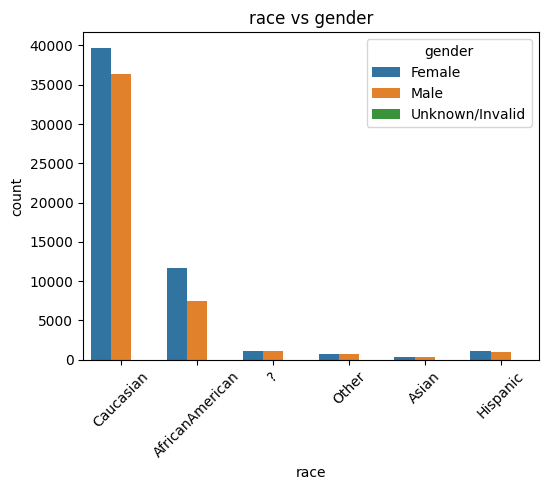

In [184]:
# Variables categóricas para countplots
categorical_pairs = [
    ('race', 'gender')
]

# Crear countplots
plt.figure(figsize=(15, 5))
for i, (x, y) in enumerate(categorical_pairs, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=df[x], hue=df[y])
    plt.title(f'{x} vs {y}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

####**Grafico 2: Histograma de relación entre age, gender y count**

En la **Figura X** se presenta un histograma que relaciona las variables *edad* y *género*. Se observa que la mayor parte de la población se concentra en los rangos de edad entre los **50 y 80 años**, con picos más altos en el intervalo de **70-80 años**, donde hay aproximadamente **14,000 mujeres** y **12,000 hombres**. En los grupos etarios más jóvenes, como los **0-10** y **10-20 años**, la cantidad de personas es significativamente menor, con menos de **2,000 individuos** en cada género.

Se destaca que, en todos los grupos de edad entre **50 y 90 años**, las mujeres están más representadas que los hombres, especialmente en los intervalos de **70-80 años**. En los grupos más jóvenes, la diferencia de género es menos pronunciada, aunque los hombres tienden a ser ligeramente más numerosos. También hay una pequeña cantidad de registros donde el género es marcado como *Unknown/Invalid*, pero su representación es mínima en comparación con los otros géneros.

En resumen, el gráfico muestra una distribución de edad donde las mujeres tienden a vivir más que los hombres, dado que están más representadas en los grupos etarios más avanzados.

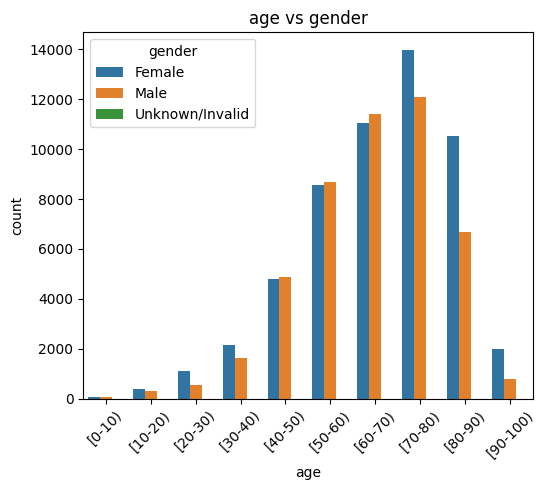

In [186]:
# Variables categóricas para countplots
categorical_pairs = [
    ('age', 'gender')
]

# Crear countplots
plt.figure(figsize=(15, 5))
for i, (x, y) in enumerate(categorical_pairs, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=df[x], hue=df[y])
    plt.title(f'{x} vs {y}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

####**Grafico 3: Diagrama de dispersion time_in_hospital vs num_medications**

En la Figura X, se presenta un diagrama de dispersión que relaciona el tiempo en el hospital con el número de medicamentos administrados a los pacientes, y está coloreado de acuerdo a si el paciente fue readmitido o no (readmitted). Los valores posibles de readmisión son:

* 0: No fue readmitido.
* 1: Fue readmitido.
* 2: Se desconoce si fue readmitido.

A primera vista, se puede observar que la mayoría de los puntos en el gráfico están coloreados de amarillo (categoría 2), lo que indica que una gran parte de los registros tienen información desconocida o inválida sobre la readmisión de los pacientes. Esto puede ser un factor importante a considerar para un análisis más profundo.

Sin embargo, también hay una cantidad significativa de puntos en verde (categoría 1) y morado (categoría 0). No parece haber una relación clara entre el tiempo en el hospital y el número de medicamentos administrados con respecto a la readmisión, ya que los puntos de diferentes categorías están distribuidos de manera bastante uniforme en toda la gráfica.

En cuanto a la estructura del gráfico, se puede ver que el número de medicamentos tiende a ser alto incluso para estadías cortas en el hospital (alrededor de 2 días). También parece haber una ligera tendencia a que los pacientes que permanecen más tiempo en el hospital (hasta 14 días) reciben una mayor cantidad de medicamentos.

En resumen, aunque el gráfico permite visualizar la distribución de estos datos, la categoría de readmisión "desconocida" parece dominar el análisis y podría requerir un tratamiento adicional en futuras investigaciones.

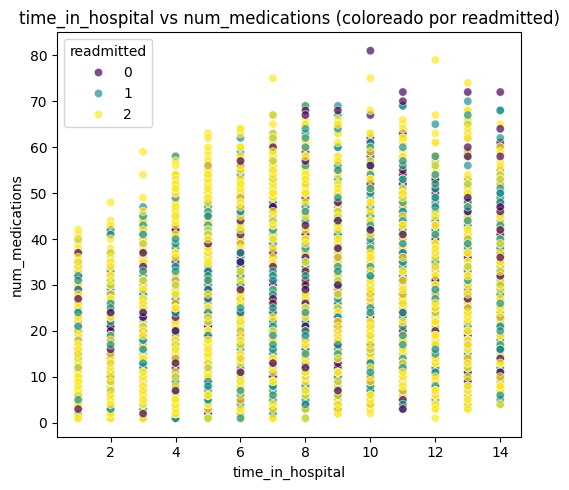

In [187]:
# Variables numéricas y categóricas para scatter plots con colores
scatter_color_pairs = [
    ('time_in_hospital', 'num_medications', 'readmitted')
]

# Crear scatter plots con colores por categoría
plt.figure(figsize=(15, 5))
for i, (x, y, hue) in enumerate(scatter_color_pairs, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=df[x], y=df[y], hue=df[hue], palette='viridis', alpha=0.7)
    plt.title(f'{x} vs {y} (coloreado por {hue})')
    plt.xlabel(x)
    plt.ylabel(y)
plt.tight_layout()
plt.show()

####**Grafico 4: Diagrama de dispersion num_lab_procedures vs num_medications**

En la Figura X, se presenta un diagrama de dispersión que relaciona el número de procedimientos de laboratorio con el número de medicamentos administrados a los pacientes, y está coloreado según el género de los pacientes. Las categorías de género incluidas son:

Female: Femenino.
Male: Masculino.
Unknown/Invalid: Género desconocido o inválido.
Al observar el gráfico, se puede ver una distribución bastante densa de puntos en el rango entre 0 y 50 procedimientos de laboratorio, con una concentración notable entre 30 y 50 medicamentos administrados. Los tres grupos de género (femenino, masculino y desconocido) parecen estar distribuidos de manera similar a lo largo de esta área, lo que sugiere que no existe una diferencia clara entre géneros en cuanto a la relación entre procedimientos de laboratorio y medicamentos administrados.

Además, se observa que algunos pacientes han recibido más de 100 procedimientos de laboratorio, aunque no parece haber una correlación lineal evidente entre la cantidad de procedimientos y los medicamentos administrados. La cantidad de medicamentos se mantiene alta incluso para aquellos que tienen menos procedimientos.

El uso del color para distinguir los géneros facilita la identificación visual, aunque la categoría Unknown/Invalid (verde claro) también tiene una presencia considerable en los datos, lo que puede influir en el análisis si no se maneja adecuadamente.

En resumen, el gráfico permite visualizar la relación entre el número de procedimientos de laboratorio y los medicamentos administrados, pero no muestra una tendencia clara diferenciada por género. La categoría de género desconocido/inválido es prominente, lo cual podría requerir una revisión o limpieza de los datos para un análisis más detallado.

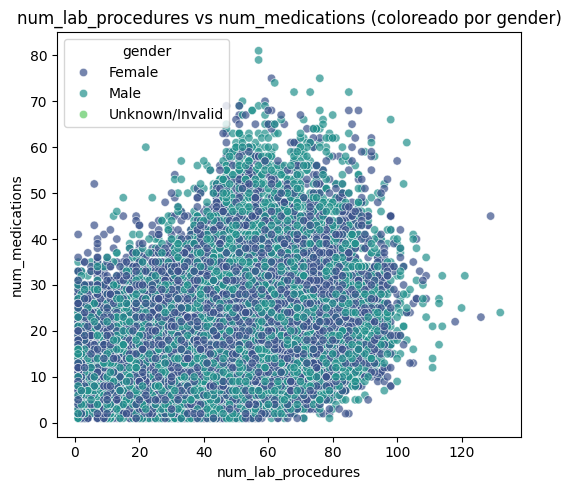

In [188]:
# Variables numéricas y categóricas para scatter plots con colores
scatter_color_pairs = [
    ('num_lab_procedures', 'num_medications', 'gender')
]

# Crear scatter plots con colores por categoría
plt.figure(figsize=(15, 5))
for i, (x, y, hue) in enumerate(scatter_color_pairs, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=df[x], y=df[y], hue=df[hue], palette='viridis', alpha=0.7)
    plt.title(f'{x} vs {y} (coloreado por {hue})')
    plt.xlabel(x)
    plt.ylabel(y)
plt.tight_layout()
plt.show()

####**Grafico 5: Diagrama de dispersion number_outpatient vs number_inpatient**

En la **Figura 5**, se presenta un diagrama de dispersión que relaciona el **número de consultas ambulatorias** (`number_outpatient`) con el **número de ingresos hospitalarios** (`number_inpatient`), coloreado según los grupos de **edad**.

El gráfico muestra lo siguiente:
- La mayor concentración de puntos se encuentra en el rango bajo de ambos ejes, con un número relativamente bajo de consultas ambulatorias y de ingresos hospitalarios.
- Las personas más jóvenes, representadas por colores más oscuros como el **morado** (0-10 años) y **azul** (10-20 años), tienden a tener más ingresos hospitalarios y menos consultas ambulatorias.
- Por otro lado, las personas de mayor edad, como las representadas por colores más claros como el **verde claro** y **amarillo** (que corresponden a edades superiores a 60 años), tienden a tener más consultas ambulatorias pero menos ingresos hospitalarios.

Esto sugiere una posible tendencia en la que los más jóvenes requieren más atención hospitalaria (internación), mientras que los mayores tienen un mayor seguimiento ambulatorio, lo cual podría estar relacionado con la naturaleza de las afecciones que requieren atención médica en los diferentes grupos de edad.

El gráfico también muestra que, a medida que aumenta el número de consultas ambulatorias, disminuye la cantidad de ingresos hospitalarios, lo cual podría reflejar un manejo adecuado de los pacientes a través de consultas ambulatorias para evitar hospitalizaciones más frecuentes.

En general, el uso del color para representar las edades facilita la identificación de patrones relacionados con la edad y el tipo de atención médica que reciben los pacientes.

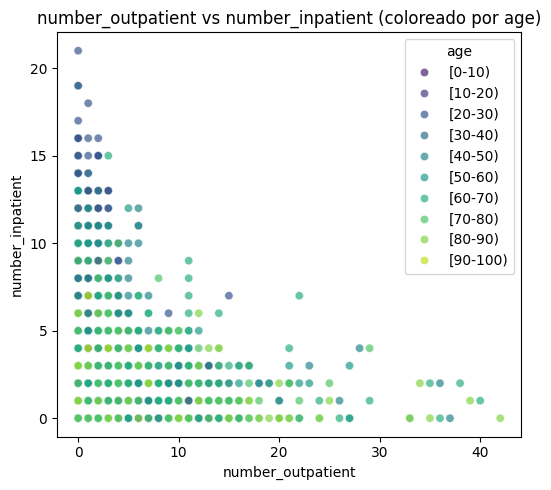

In [189]:
# Variables numéricas y categóricas para scatter plots con colores
scatter_color_pairs = [
    ('number_outpatient', 'number_inpatient', 'age')  # Colorear por edad
]

# Crear scatter plots con colores por categoría
plt.figure(figsize=(15, 5))
for i, (x, y, hue) in enumerate(scatter_color_pairs, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=df[x], y=df[y], hue=df[hue], palette='viridis', alpha=0.7)
    plt.title(f'{x} vs {y} (coloreado por {hue})')
    plt.xlabel(x)
    plt.ylabel(y)
plt.tight_layout()
plt.show()

####**Grafico 6: Diagrama circular de pacientes medicados por genero**

En el **Gráfico 6**, se presenta un **diagrama circular** que muestra la **proporción de pacientes medicados y no medicados por género**. A continuación, algunos puntos importantes que se observan en este gráfico:

- **41.1%** de los pacientes son mujeres que están medicadas (etiquetado como "Female - Medicados"), lo que representa el segmento más grande en el gráfico.
- **35.9%** de los pacientes son hombres que están medicados ("Male - Medicados"), siendo el segundo grupo más grande.
- Los pacientes masculinos no medicados ("Male - No Medicados") constituyen el **10.3%** del total.
- Finalmente, las mujeres no medicadas ("Female - No Medicados") representan el **12.7%** del total.

Este gráfico es útil para visualizar rápidamente cómo se distribuyen los pacientes por género y estado de medicación, destacando que la mayor proporción de personas medicadas corresponde a las mujeres, mientras que los hombres tienen una mayor proporción de pacientes no medicados.

El uso de diferentes colores para cada segmento permite una distinción clara entre las categorías, facilitando la interpretación de la información.

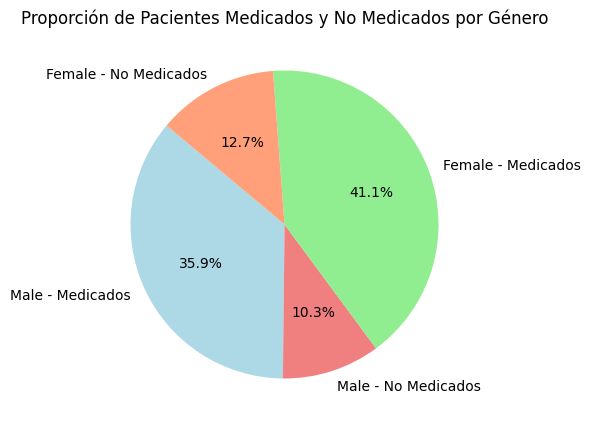

In [192]:
# Filtrar datos por género y estado de medicación
male_medicated = df[(df['gender'] == 'Male') & (df['diabetesMed'] == 'Yes')].shape[0]
male_not_medicated = df[(df['gender'] == 'Male') & (df['diabetesMed'] == 'No')].shape[0]
female_medicated = df[(df['gender'] == 'Female') & (df['diabetesMed'] == 'Yes')].shape[0]
female_not_medicated = df[(df['gender'] == 'Female') & (df['diabetesMed'] == 'No')].shape[0]

# Datos para el gráfico de torta
labels = ['Male - Medicados', 'Male - No Medicados', 'Female - Medicados', 'Female - No Medicados']
sizes = [male_medicated, male_not_medicated, female_medicated, female_not_medicated]
colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightsalmon']

# Crear el gráfico de torta
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de Pacientes Medicados y No Medicados por Género')
plt.show()